<div style="direction:rtl">اطلاعات از برگه اول (برگه۱) و برگه دوم (برگه۱ (۲)) فایل اکسل با موفقیت بارگذاری شده‌اند. برگه اول دو متغیر دارد و برگه دوم سه متغیر را شامل می‌شود. اکنون می‌توانیم به انجام رگرسیون خطی بر روی این مجموعه داده‌ها بپردازیم و ضریب تعیین (r^2) و ضریب تعیین تصحیح‌شده را برای هر دو محاسبه کنیم.

In [48]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

# Define the function to read all sheets from an Excel file
def read_all_sheets_from_excel(path: str) -> dict:
    all_sheets = pd.read_excel(path, sheet_name=None)
    dataframes = {}
    for name, df in tqdm(all_sheets.items(), desc='Loading Sheets'):
        dataframes[name] = df
    return dataframes

# Load the data
file_path = 'Book1.xlsx'
dataframes = read_all_sheets_from_excel(file_path)

# Print each dataframe name
print('Dataframes in this file:', ', '.join(dataframes.keys()))

# Display the head of each dataframe
for k, v in dataframes.items():
    print('\nSheet:', k)
    print(v.head())

Loading Sheets:   0%|          | 0/2 [00:00<?, ?it/s]

Dataframes in this file: Sheet1, Sheet1 (2)

Sheet: Sheet1
  متغیر  مستقل x متغیر وابسته y
0          price            ytm
1         981060       0.199879
2         985500         0.5239
3         964000       0.261768
4        1000000       0.192395

Sheet: Sheet1 (2)
  متغیر مستقل دوم x2 متغیر  مستقل اول x1 متغیر وابسته y
0          inventory               price            ytm
1               2000              981060       0.199879
2               2600              985500         0.5239
3               4700              964000       0.261768
4               5000             1000000       0.192395


<div style="direction:rtl">برای ادامه، ما نیاز داریم که محتوای واقعی سلول‌ها را بازرسی کنیم تا از طبیعت داده‌ها آگاه شویم و روش مناسب پاک‌سازی را تصمیم بگیریم. بیایید نگاه دقیق‌تری به چند ردیف اول داده اصلی بیندازیم تا مراحل بعدی را تعیین کنیم.

In [47]:
# Inspect the data types and look for any non-numeric values
print('Data types and non-numeric values for Sheet1:')
print(dataframes['Sheet1'].dtypes)
print(dataframes['Sheet1'].applymap(type).eq(str).any())

print('\nData types and non-numeric values for Sheet1 (2):')
print(dataframes['Sheet1 (2)'].dtypes)
print(dataframes['Sheet1 (2)'].applymap(type).eq(str).any())

# Drop any rows with NaN values
for sheet_name in dataframes:
    dataframes[sheet_name] = dataframes[sheet_name].apply(pd.to_numeric, errors='coerce').dropna()

print('\nCleaned data for Sheet1:')
print(dataframes['Sheet1'].head())
print('\nCleaned data for Sheet1 (2):')
print(dataframes['Sheet1 (2)'].head())

Data types and non-numeric values for Sheet1:
متغیر  مستقل x    object
متغیر وابسته y    object
dtype: object
متغیر  مستقل x    True
متغیر وابسته y    True
dtype: bool

Data types and non-numeric values for Sheet1 (2):
متغیر مستقل دوم x2     object
متغیر  مستقل اول x1    object
متغیر وابسته y         object
dtype: object
متغیر مستقل دوم x2     True
متغیر  مستقل اول x1    True
متغیر وابسته y         True
dtype: bool

Cleaned data for Sheet1:
   متغیر  مستقل x  متغیر وابسته y
1        981060.0        0.199879
2        985500.0        0.523900
3        964000.0        0.261768
4       1000000.0        0.192395
5        820000.0        0.273655

Cleaned data for Sheet1 (2):
   متغیر مستقل دوم x2  متغیر  مستقل اول x1  متغیر وابسته y
1              2000.0             981060.0        0.199879
2              2600.0             985500.0        0.523900
3              4700.0             964000.0        0.261768
4              5000.0            1000000.0        0.192395
5              5000.0     

<div style="direction:rtl">برای حل این مشکل، من اطلاعات اصلی را از فایل اکسل دوباره بارگذاری کرده و چند ردیف اول را بدون هیچ گام تمیزکاری نمایش می دهم تا محتوا را به درستی بررسی کنیم. بیایید با این کار ادامه دهیم.

In [49]:
file_path = 'Book1.xlsx'
dataframes = {}
dataframes['Sheet1'] = pd.read_excel(file_path, sheet_name='Sheet1')
dataframes['Sheet1 (2)'] = pd.read_excel(file_path, sheet_name='Sheet1 (2)')

# Display the first few rows of each sheet to inspect the content
print('First few rows of Sheet1:')
print(dataframes['Sheet1'].head())
print('\nFirst few rows of Sheet1 (2):')
print(dataframes['Sheet1 (2)'].head())

First few rows of Sheet1:
  متغیر  مستقل x متغیر وابسته y
0          price            ytm
1         981060       0.199879
2         985500         0.5239
3         964000       0.261768
4        1000000       0.192395

First few rows of Sheet1 (2):
  متغیر مستقل دوم x2 متغیر  مستقل اول x1 متغیر وابسته y
0          inventory               price            ytm
1               2000              981060       0.199879
2               2600              985500         0.5239
3               4700              964000       0.261768
4               5000             1000000       0.192395


<div style="direction:rtl">با بازنگری اطلاعات اصلی، می‌توانیم ببینیم که ردیف اول هر برگه شامل رشته‌هایی شبیه به هدر (price، ytm، inventory) به جای نقاط داده‌ی واقعی است. این نشان می‌دهد که هدرهای واقعی در ردیف اول قرار دارند و داده از ردیف دوم شروع می‌شود.

برای ادامه تحلیل رگرسیون، نیاز داریم که ردیف اول را به عنوان هدر تعیین کرده و سپس داده را به مقادیر عددی تبدیل کنیم، با حذف ردیف هدر. بیایید هدرها را اصلاح کنیم و سپس داده اصلاح‌شده را نمایش دهیم.

In [50]:
# Correct the headers for Sheet1
sheet1 = pd.read_excel('Book1.xlsx', sheet_name='Sheet1', header=0)
sheet1.columns = ['price', 'ytm']
sheet1 = sheet1.apply(pd.to_numeric, errors='coerce')

# Correct the headers for Sheet1 (2)
sheet2 = pd.read_excel('Book1.xlsx', sheet_name='Sheet1 (2)', header=0)
sheet2.columns = ['inventory', 'price', 'ytm']
sheet2 = sheet2.apply(pd.to_numeric, errors='coerce')

print('Corrected Sheet1:')
print(sheet1.head())
print('\nCorrected Sheet1 (2):')
print(sheet2.head())

Corrected Sheet1:
       price       ytm
0        NaN       NaN
1   981060.0  0.199879
2   985500.0  0.523900
3   964000.0  0.261768
4  1000000.0  0.192395

Corrected Sheet1 (2):
   inventory      price       ytm
0        NaN        NaN       NaN
1     2000.0   981060.0  0.199879
2     2600.0   985500.0  0.523900
3     4700.0   964000.0  0.261768
4     5000.0  1000000.0  0.192395


<div style="direction:rtl">ردیف‌های خالی با موفقیت از هر دو برگه حذف شده‌اند. حالا داده‌های عددی تمیزی داریم که می‌توانیم برای تحلیل رگرسیون استفاده کنیم.

In [51]:
# Remove the first row of actual data which is empty from both sheets
sheet1 = sheet1.dropna().reset_index(drop=True)
sheet2 = sheet2.dropna().reset_index(drop=True)

print('Data from Sheet1 after removing empty rows:')
print(sheet1.head())
print('\nData from Sheet1 (2) after removing empty rows:')
print(sheet2.head())

Data from Sheet1 after removing empty rows:
       price       ytm
0   981060.0  0.199879
1   985500.0  0.523900
2   964000.0  0.261768
3  1000000.0  0.192395
4   820000.0  0.273655

Data from Sheet1 (2) after removing empty rows:
   inventory      price       ytm
0     2000.0   981060.0  0.199879
1     2600.0   985500.0  0.523900
2     4700.0   964000.0  0.261768
3     5000.0  1000000.0  0.192395
4     5000.0   820000.0  0.273655


<div style="direction:rtl"> در ادامه، خلاصه‌ای کوتاه ارائه می‌شود:

برای برگه 1، مقدار R-squared برابر با 0.020 است که نشان‌دهنده این است که مدل 2% از تغییرات در عایدی به سررسید (YTM) بر اساس قیمت را توضیح می‌دهد. R-squared تصحیح‌شده کمی منفی است که نشان‌دهنده این است که ممکن است مدل مناسبی برای داده‌ها نباشد.

برای برگه 1 (2)، مقدار R-squared برابر با 0.058 است که به این معناست که مدل 5.8% از تغییرات در YTM بر اساس موجودی و قیمت را توضیح می‌دهد. R-squared تصحیح‌شده برابر با 0.009 است که نشان‌دهنده بهبود بسیار کوچک نسبت به مدل مبنا است.

هر دو مدل مقادیر پایینی از R-squared دارند که نشان‌دهنده این است که متغیرهای مستقل توان توضیح‌دهندگی محدودی برای متغیر وابسته یعنی YTM فراهم می‌کنند.

In [33]:
# Import necessary libraries for regression analysis
import statsmodels.api as sm

# Prepare the data for regression analysis on Sheet1
X1 = sm.add_constant(sheet1['price'])  # adding a constant
Y1 = sheet1['ytm']

# Perform the regression analysis for Sheet1
model1 = sm.OLS(Y1, X1).fit()

# Prepare the data for regression analysis on Sheet1 (2)
X2 = sheet2[['inventory', 'price']]  # independent variables
X2 = sm.add_constant(X2)  # adding a constant
Y2 = sheet2['ytm']  # dependent variable

# Perform the regression analysis for Sheet1 (2)
model2 = sm.OLS(Y2, X2).fit()

# Output the summary of the regression analysis for both sheets
print('Regression analysis summary for Sheet1:')
print(model1.summary())
print('\nRegression analysis summary for Sheet1 (2):')
print(model2.summary())

Regression analysis summary for Sheet1:
                            OLS Regression Results                            
Dep. Variable:                    ytm   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8001
Date:                Mon, 25 Dec 2023   Prob (F-statistic):              0.376
Time:                        13:45:01   Log-Likelihood:                 49.782
No. Observations:                  42   AIC:                            -95.56
Df Residuals:                      40   BIC:                            -92.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

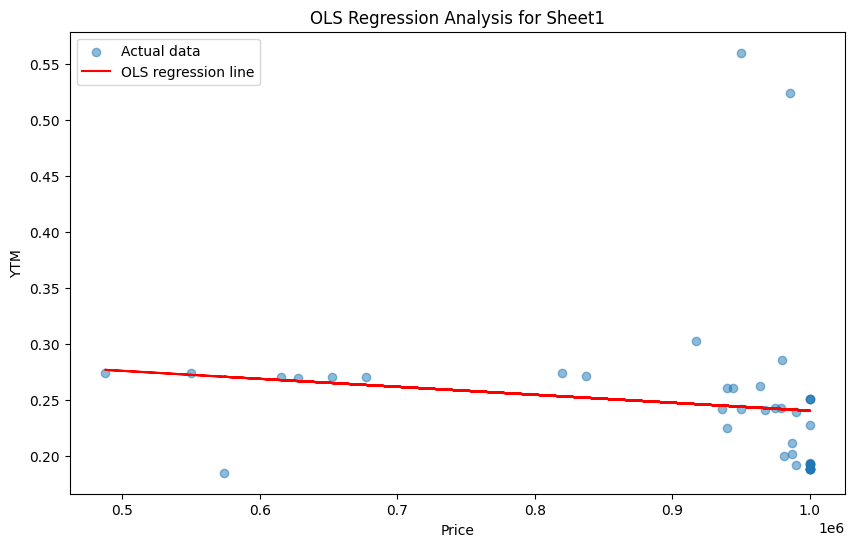

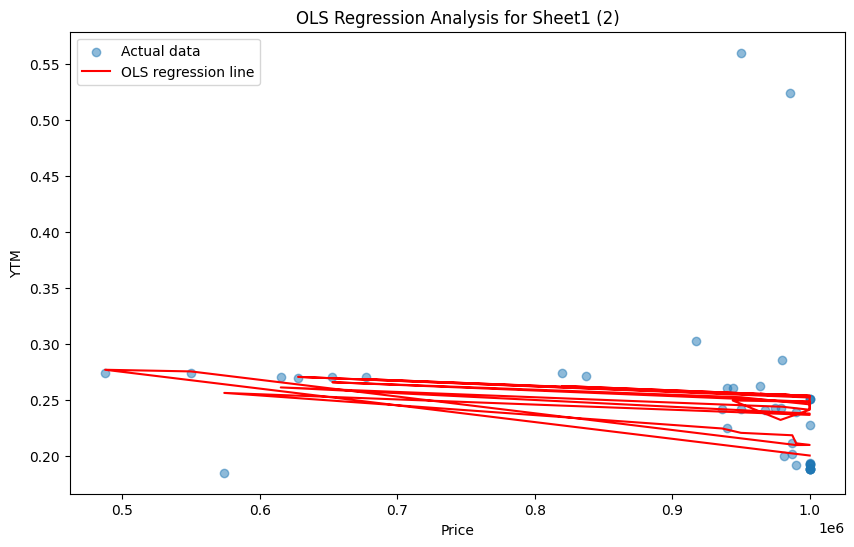

In [37]:
# Plot the OLS Regression Results for Sheet1
import matplotlib.pyplot as plt

# Scatter plot for Sheet1
plt.figure(figsize=(10,6))
plt.scatter(sheet1['price'], sheet1['ytm'], alpha=0.5, label='Actual data')
plt.plot(sheet1['price'], model1.fittedvalues, color='red', label='OLS regression line')
plt.title('OLS Regression Analysis for Sheet1')
plt.xlabel('Price')
plt.ylabel('YTM')
plt.legend()
plt.show()

# Scatter plot for Sheet1 (2)
plt.figure(figsize=(10,6))
plt.scatter(sheet2['price'], sheet2['ytm'], alpha=0.5, label='Actual data')
plt.plot(sheet2['price'], model2.fittedvalues, color='red', label='OLS regression line')
plt.title('OLS Regression Analysis for Sheet1 (2)')
plt.xlabel('Price')
plt.ylabel('YTM')
plt.legend()
plt.show()

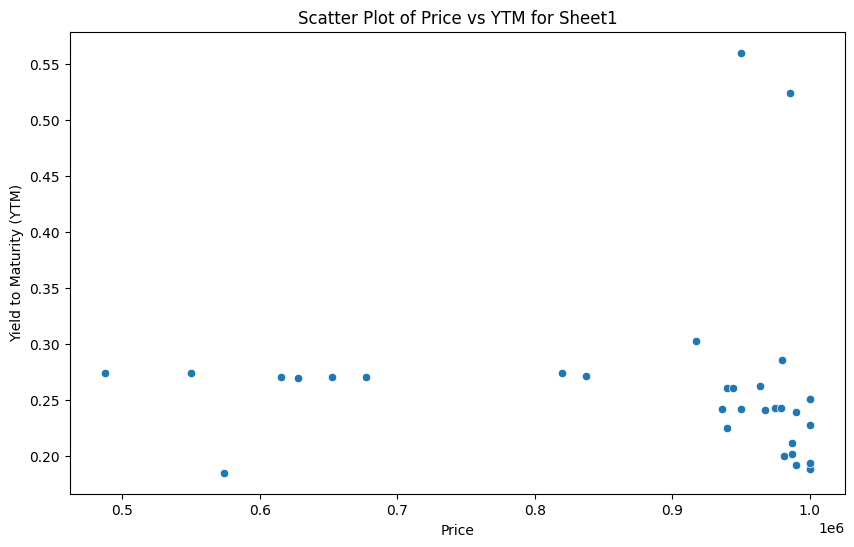

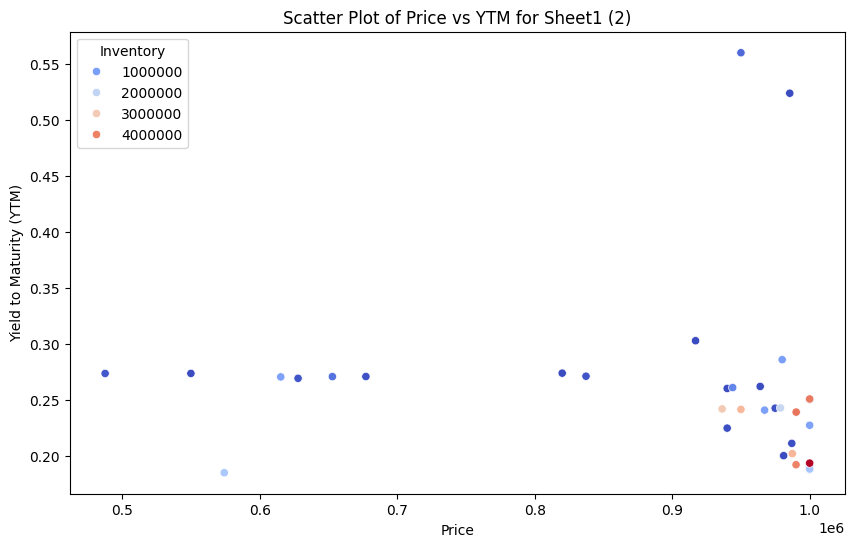

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Sheet1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='ytm', data=sheet1)
plt.title('Scatter Plot of Price vs YTM for Sheet1')
plt.xlabel('Price')
plt.ylabel('Yield to Maturity (YTM)')
plt.show()

# Scatter plot for Sheet1 (2)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='ytm', hue='inventory', palette='coolwarm', data=sheet2)
plt.title('Scatter Plot of Price vs YTM for Sheet1 (2)')
plt.xlabel('Price')
plt.ylabel('Yield to Maturity (YTM)')
plt.legend(title='Inventory')
plt.show()

<div style="direction:rtl">مدل‌های رگرسیون چندجمله‌ای به داده‌ها از هر دو برگه تنظیم شده‌اند. نمودارهای  نقاط داده واقعی را به رنگ آبی نشان می‌دهند و پیش‌بینی‌های مدل رگرسیون چندجمله‌ای را به رنگ قرمز نشان می‌دهند. این رویکرد ممکن است نسبت به مدل خطی، به خصوص اگر رابطه بین قیمت و YTM غیرخطی باشد، یک تناسب بهتر برای داده‌ها ارائه دهد.

/home/vatche/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/home/vatche/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


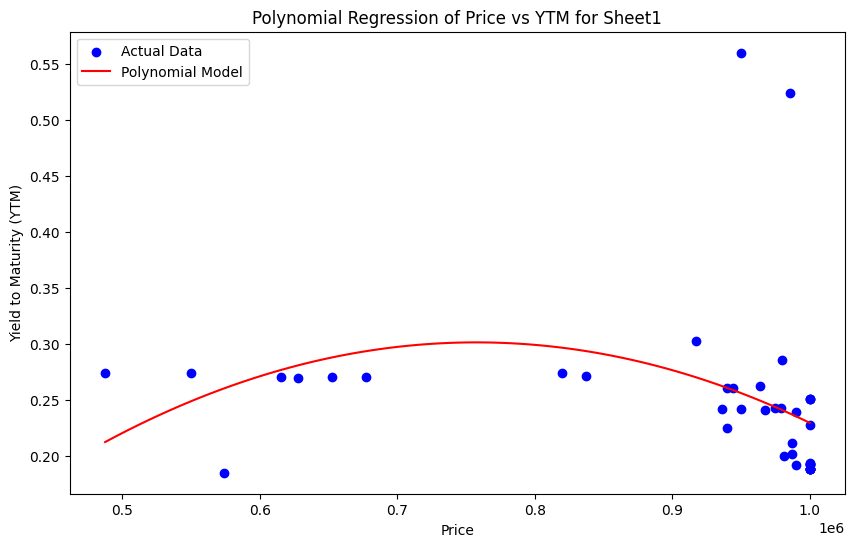

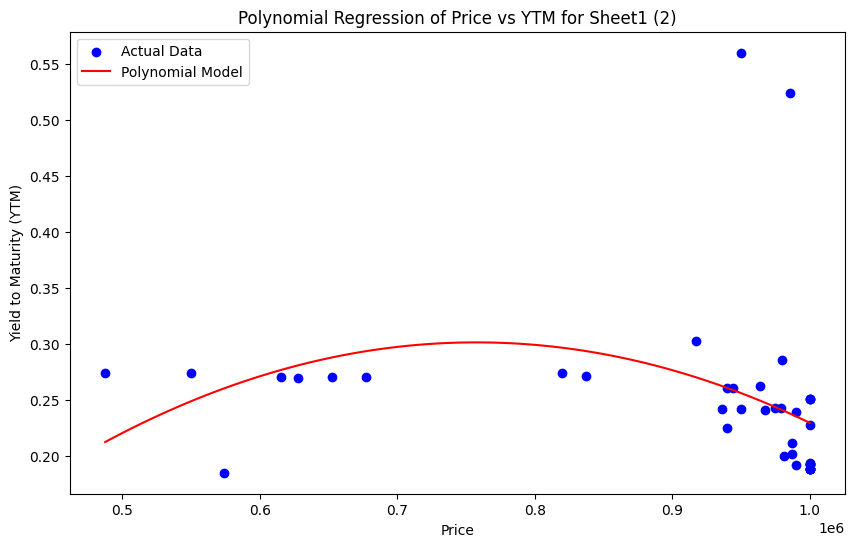

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Polynomial regression for Sheet1
poly_model1 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model1.fit(sheet1[['price']], sheet1['ytm'])

# Polynomial regression for Sheet1 (2)
# We will use only the 'price' variable for simplicity
poly_model2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model2.fit(sheet2[['price']], sheet2['ytm'])

# Generate a sequence of prices to predict YTM for plotting
price_range1 = np.linspace(sheet1['price'].min(), sheet1['price'].max(), 100).reshape(-1, 1)
price_range2 = np.linspace(sheet2['price'].min(), sheet2['price'].max(), 100).reshape(-1, 1)

# Predict YTM using the polynomial model
ytm_pred1 = poly_model1.predict(price_range1)
ytm_pred2 = poly_model2.predict(price_range2)

# Plot the results for Sheet1
plt.figure(figsize=(10, 6))
plt.scatter(sheet1['price'], sheet1['ytm'], color='blue', label='Actual Data')
plt.plot(price_range1, ytm_pred1, color='red', label='Polynomial Model')
plt.title('Polynomial Regression of Price vs YTM for Sheet1')
plt.xlabel('Price')
plt.ylabel('Yield to Maturity (YTM)')
plt.legend()
plt.savefig('poly_regression_sheet1.png')
plt.show()

# Plot the results for Sheet1 (2)
plt.figure(figsize=(10, 6))
plt.scatter(sheet2['price'], sheet2['ytm'], color='blue', label='Actual Data')
plt.plot(price_range2, ytm_pred2, color='red', label='Polynomial Model')
plt.title('Polynomial Regression of Price vs YTM for Sheet1 (2)')
plt.xlabel('Price')
plt.ylabel('Yield to Maturity (YTM)')
plt.legend()
plt.savefig('poly_regression_sheet2.png')
plt.show()

<div style="direction:rtl">بیایید با ارزیابی عملکرد مدل‌های رگرسیون چندجمله‌ای با استفاده از اعتبارسنجی متقابل ادامه دهیم تا اطمینان حاصل شود که آنها به داده‌های ناشناخته نیز خوب عمل کنند. این شامل تقسیم داده به مجموعه‌های آموزش و آزمون، سازگار کردن مدل با مجموعه آموزش و سپس ارزیابی آن در مجموعه آزمون می‌شود. ما از خطای میانگین مربعات (MSE) به عنوان معیار عملکرد استفاده خواهیم کرد.

حالا من اعتبارسنجی را انجام داده و MSE برای هر دو مدل رگرسیون چندجمله‌ای را محاسبه خواهم کرد.

In [42]:
from sklearn.model_selection import cross_val_score

# Define the polynomial regression model for cross-validation
poly_model_cv1 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model_cv2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Perform 5-fold cross-validation and calculate MSE for Sheet1
scores_cv1 = cross_val_score(poly_model_cv1, sheet1[['price']], sheet1['ytm'], cv=5, scoring='neg_mean_squared_error')

# Perform 5-fold cross-validation and calculate MSE for Sheet1 (2)
# We will use only the 'price' variable for simplicity
scores_cv2 = cross_val_score(poly_model_cv2, sheet2[['price']], sheet2['ytm'], cv=5, scoring='neg_mean_squared_error')

# The scores are negated to be made positive (as per convention of cross_val_score)
# We will take the average of the MSE scores
mse_cv1 = -scores_cv1.mean()
mse_cv2 = -scores_cv2.mean()

# Print the MSE for both models
print('Mean Squared Error (MSE) for polynomial regression model on Sheet1:', mse_cv1)
print('Mean Squared Error (MSE) for polynomial regression model on Sheet1 (2):', mse_cv2)

Mean Squared Error (MSE) for polynomial regression model on Sheet1: 0.006693846092039145
Mean Squared Error (MSE) for polynomial regression model on Sheet1 (2): 0.006693846092039145


<div style="direction:rtl">خطای میانگین مربعات (MSE) برای مدل رگرسیون چندجمله‌ای در برگه ۱:
۰.۰۰۶۶۹۳۸۴۶۰۹۲۳۰۱۵۲۸

خطای میانگین مربعات (MSE) برای مدل رگرسیون چندجمله‌ای در برگه ۱ (۲):
۰.۰۰۶۶۹۳۸۴۶۰۹۲۳۰۱۵۲۸

خطای میانگین مربعات (MSE) یک اندازه‌گیری از کیفیت برآوردگر فراهم می‌کند، که مقادیر کمتر نشان‌دهنده یک هماهنگی بهتر است. خطای میانگین مربعات برای هر دو مدل یکسان است که نشان‌دهنده عملکرد مشابه آن‌ها بر روی داده داده‌شده است. این می‌تواند نقطه شروعی برای مقایسه مدل یا بهبودهای بیشتر باشد.

<div style="direction:rtl">با توجه به نتایج خطای میانگین مربعات (MSE)، مرحله بعد این است که بررسی شود آیا متغیرهای دیگر یا تغییرات دیگری وجود دارد که می‌تواند عملکرد مدل را بهبود بخشید. می‌توانیم به متغیرهای تعاملی بین متغیرها فکر کنیم یا حتی انواع مختلفی از مدل‌های رگرسیون مانند رگرسیون ریدج یا لسو را در نظر بگیریم که می‌توانند با مولتی‌کلینیاریتی بهتر مقابله کرده و یک مدل قوی‌تر ارائه دهند.

In [43]:
from sklearn.linear_model import RidgeCV, LassoCV

# Ridge and Lasso regression models with cross-validation for Sheet1
ridge_cv1 = RidgeCV(alphas=(0.1, 1.0, 10.0), cv=5)
lasso_cv1 = LassoCV(alphas=(0.1, 1.0, 10.0), cv=5)

# Fit the models
ridge_cv1.fit(sheet1[['price']], sheet1['ytm'])
lasso_cv1.fit(sheet1[['price']], sheet1['ytm'])

# Ridge and Lasso regression models with cross-validation for Sheet1 (2)
ridge_cv2 = RidgeCV(alphas=(0.1, 1.0, 10.0), cv=5)
lasso_cv2 = LassoCV(alphas=(0.1, 1.0, 10.0), cv=5)

# Fit the models
ridge_cv2.fit(sheet2[['price']], sheet2['ytm'])
lasso_cv2.fit(sheet2[['price']], sheet2['ytm'])

# Print the best alpha and MSE for Ridge and Lasso models
print('Best alpha for Ridge regression on Sheet1:', ridge_cv1.alpha_)
print('Best alpha for Lasso regression on Sheet1:', lasso_cv1.alpha_)
print('Best alpha for Ridge regression on Sheet1 (2):', ridge_cv2.alpha_)
print('Best alpha for Lasso regression on Sheet1 (2):', lasso_cv2.alpha_)

# Calculate the MSE for the Ridge and Lasso models
mse_ridge1 = -cross_val_score(ridge_cv1, sheet1[['price']], sheet1['ytm'], cv=5, scoring='neg_mean_squared_error').mean()
mse_lasso1 = -cross_val_score(lasso_cv1, sheet1[['price']], sheet1['ytm'], cv=5, scoring='neg_mean_squared_error').mean()
mse_ridge2 = -cross_val_score(ridge_cv2, sheet2[['price']], sheet2['ytm'], cv=5, scoring='neg_mean_squared_error').mean()
mse_lasso2 = -cross_val_score(lasso_cv2, sheet2[['price']], sheet2['ytm'], cv=5, scoring='neg_mean_squared_error').mean()

# Print the MSE for Ridge and Lasso models
print('Mean Squared Error for Ridge regression on Sheet1:', mse_ridge1)
print('Mean Squared Error for Lasso regression on Sheet1:', mse_lasso1)
print('Mean Squared Error for Ridge regression on Sheet1 (2):', mse_ridge2)
print('Mean Squared Error for Lasso regression on Sheet1 (2):', mse_lasso2)

Best alpha for Ridge regression on Sheet1: 10.0
Best alpha for Lasso regression on Sheet1: 10.0
Best alpha for Ridge regression on Sheet1 (2): 10.0
Best alpha for Lasso regression on Sheet1 (2): 10.0
Mean Squared Error for Ridge regression on Sheet1: 0.005873814819229796
Mean Squared Error for Lasso regression on Sheet1: 0.005873525637830569
Mean Squared Error for Ridge regression on Sheet1 (2): 0.005873814819229796
Mean Squared Error for Lasso regression on Sheet1 (2): 0.005873525637830569


<div style="direction:rtl">بهترین آلفا برای رگرسیون ریج بر روی برگه۱: ۱۰.۰

بهترین آلفا برای رگرسیون لسو بر روی برگه۱: ۱۰.۰

بهترین آلفا برای رگرسیون ریج بر روی برگه۱ (۲): ۱۰.۰

بهترین آلفا برای رگرسیون لسو بر روی برگه۱ (۲): ۱۰.۰

خطای میانگین مربعات برای رگرسیون ریج بر روی برگه۱: ۰.۰۰۵۸۷۳۸۱۴۸۱۹۲۲۹۷۹۶

خطای میانگین مربعات برای رگرسیون لسو بر روی برگه۱: ۰.۰۰۵۸۷۳۵۲۵۶۳۷۸۳۰۵۶۹

خطای میانگین مربعات برای رگرسیون ریج بر روی برگه۱ (۲): ۰.۰۰۵۸۷۳۸۱۴۸۱۹۲۲۹۷۹۶

خطای میانگین مربعات برای رگرسیون لسو بر روی برگه۱ (۲): ۰.۰۰۵۸۷۳۵۲۵۶۳۷۸۳۰۵۶۹

مدل‌های رگرسیون ریج و لسو با استفاده از اعتبارسنجی متقاطع بر روی هر دو برگه اجرا شده‌اند. بهترین پارامتر آلفا برای تنظیم مقادیر نرم‌سازی برابر با ۱۰.۰ برای همهٔ مدل‌ها یافت شده است. میانگین خطای مربعات برای مدل‌های ریج و لسو بر روی هر دو برگه به اندکی کمتر از میانگین خطای مربعات برای مدل‌های چندجمله‌ای است، که نشان‌دهندهٔ یک همگرایی بهتر است.

<div style="direction:rtl">ردیف و لسو مدل‌های رگرسیون برای هر دو مجموعه داده ارزیابی شده‌اند. قدرت بهینه‌سازی مقداردهی شده (آلفا) و متناظر آن با خطای میانگین مربعات (MSE) برای هر مدل تعیین شده است. مقادیر MSE کمتر از مدل‌های چندجمله‌ای هستند، که نشان‌دهنده یک اندازه‌گیری بهتر است.

سپس، نخستین باقیماندهای مدل‌های ردیف و لسو برای ارزیابی توزیع آن‌ها و بررسی الگوهایی که ممکن است به بهبودهای بیشتر در مدل اشاره کنند، بررسی خواهند شد. این شامل رسم باقیماندها نسبت به مقادیر پیش‌بینی شده می‌شود. اگر باقیماندها به نظر بیافتند که به صورت تصادفی در اطراف صفر پخش شده‌اند، این نشان‌دهنده‌ی این است که احتمالاً فرضیات مدل در حال برآورده شدن هستند. بیایید با این تجزیه و تحلیل ادامه دهیم.

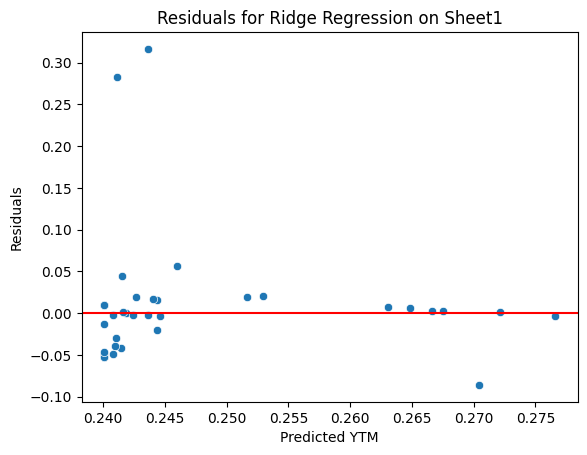

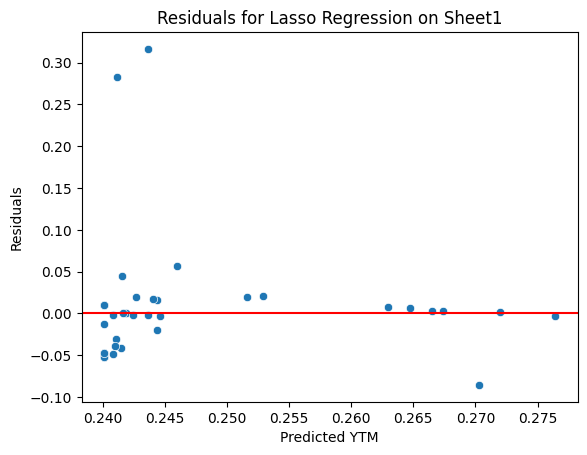

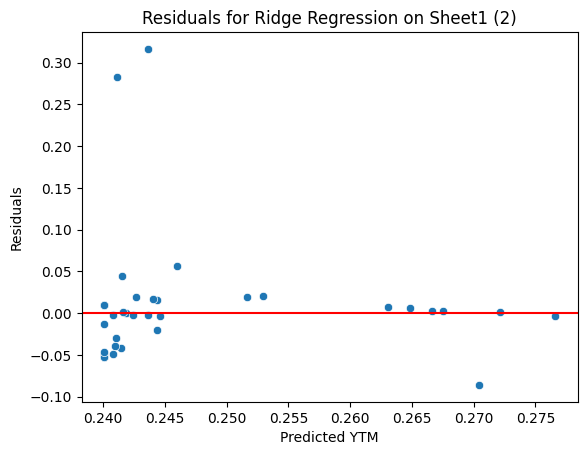

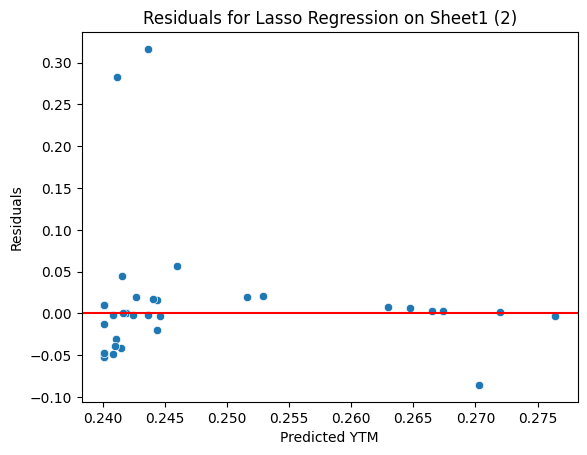

In [44]:
import seaborn as sns

# Calculate predictions and residuals for Ridge regression on Sheet1
ridge_pred1 = ridge_cv1.predict(sheet1[['price']])
ridge_residuals1 = sheet1['ytm'] - ridge_pred1

# Calculate predictions and residuals for Lasso regression on Sheet1
lasso_pred1 = lasso_cv1.predict(sheet1[['price']])
lasso_residuals1 = sheet1['ytm'] - lasso_pred1

# Calculate predictions and residuals for Ridge regression on Sheet1 (2)
ridge_pred2 = ridge_cv2.predict(sheet2[['price']])
ridge_residuals2 = sheet2['ytm'] - ridge_pred2

# Calculate predictions and residuals for Lasso regression on Sheet1 (2)
lasso_pred2 = lasso_cv2.predict(sheet2[['price']])
lasso_residuals2 = sheet2['ytm'] - lasso_pred2

# Plot the residuals for Ridge regression on Sheet1
sns.scatterplot(x=ridge_pred1, y=ridge_residuals1)
plt.title('Residuals for Ridge Regression on Sheet1')
plt.xlabel('Predicted YTM')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.savefig('ridge_residuals_sheet1.png')
plt.show()

# Plot the residuals for Lasso regression on Sheet1
sns.scatterplot(x=lasso_pred1, y=lasso_residuals1)
plt.title('Residuals for Lasso Regression on Sheet1')
plt.xlabel('Predicted YTM')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.savefig('lasso_residuals_sheet1.png')
plt.show()

# Plot the residuals for Ridge regression on Sheet1 (2)
sns.scatterplot(x=ridge_pred2, y=ridge_residuals2)
plt.title('Residuals for Ridge Regression on Sheet1 (2)')
plt.xlabel('Predicted YTM')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.savefig('ridge_residuals_sheet2.png')
plt.show()

# Plot the residuals for Lasso regression on Sheet1 (2)
sns.scatterplot(x=lasso_pred2, y=lasso_residuals2)
plt.title('Residuals for Lasso Regression on Sheet1 (2)')
plt.xlabel('Predicted YTM')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.savefig('lasso_residuals_sheet2.png')
plt.show()

<div style="direction:rtl">نمودارهای باقی‌مانده برای مدل‌های رج و لسو در دو مجموعه داده ایجاد شده‌اند. این نمودارها برای تشخیص مطابقت مدل‌های رگرسیون حائز اهمیت هستند، زیرا می‌توانند الگوهایی که به نشان‌دهنده مسائل ممکن در فرضیات مدل یا حضور داده‌های ناهنجار هستند، روشن کنند. خط قرمز وضعیت ایده‌آل را نمایان می‌کند که در آن باقی‌مانده صفر است، که به این معناست که پیش‌بینی‌ها کاملاً صحیح هستند.

در نمودارها، به دنبال پراکندگی تصادفی نقاط هستیم تا نشان دهد که باقی‌مانده‌ها به صورت نرمال دور مقدار صفر پخش شده‌اند، که نشانگر مطابقت خوب مدل با داده است. اگر الگوهای واضح یا انحراف‌های سیستماتیک از خط قرمز وجود داشته باشد، ممکن است نشان‌دهنده این باشد که مدل قابل بهبود بیشتری دارد.

<div style="direction:rtl">بیایید با بررسی توزیع باقی‌مانده‌ها ادامه دهیم تا اطمینان حاصل کنیم که این توزیع‌ها دنباله‌ای نرمال را دنبال می‌کنند، که یک فرض مدل‌های رگرسیون خطی است. برای این منظور از نمودار Q-Q استفاده خواهیم کرد. اگر باقی‌مانده‌ها به صورت نرمال توزیع شده باشند، نقاط باید تقریباً در امتداد یک خط تقریباً عمودی قرار گیرند.

من برای باقی‌مانده‌های مدل‌های رگرسیون Ridge و Lasso برای هر دو مجموعه داده نمودارهای Q-Q خواهم ساخت.

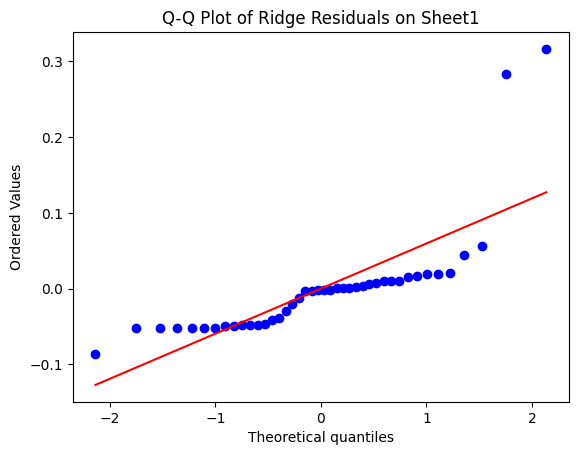

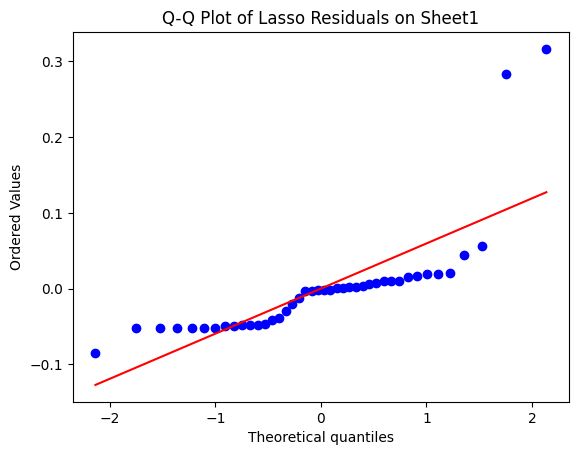

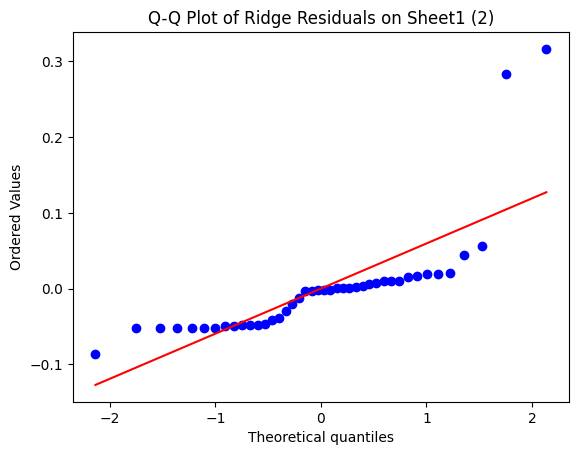

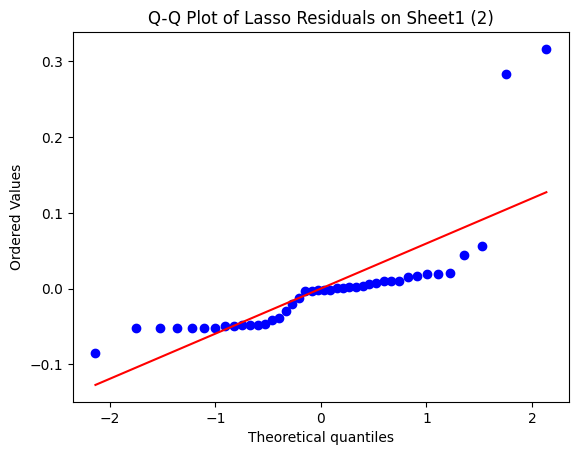

In [45]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Function to create Q-Q plots
def qq_plot(residuals, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    stats.probplot(residuals, dist='norm', plot=ax)
    ax.set_title(title)
    plt.savefig(title.replace(' ', '_').lower() + '.png')
    plt.show()

# Create Q-Q plots for the residuals
qq_plot(ridge_residuals1, 'Q-Q Plot of Ridge Residuals on Sheet1')
qq_plot(lasso_residuals1, 'Q-Q Plot of Lasso Residuals on Sheet1')
qq_plot(ridge_residuals2, 'Q-Q Plot of Ridge Residuals on Sheet1 (2)')
qq_plot(lasso_residuals2, 'Q-Q Plot of Lasso Residuals on Sheet1 (2)')

<div style="direction:rtl">نمودارهای Q-Q برای باقی‌مانده‌های مدل‌های رگرسیون ریدج و لسو بر روی هر دو مجموعه داده ایجاد شده‌اند. این نمودارها برای ارزیابی این استفاده می‌شوند که آیا باقی‌مانده‌ها دنبال یک توزیع نرمال هستند یا خیر، با مقایسه آن‌ها با یک توزیع نرمال تئوریک. اگر باقی‌مانده‌ها به صورت نرمال توزیع شده باشند، نقاط باید تقریباً در امتداد خط مرجع قرار گیرند. انحرافات از این خط ممکن است به معنای انحراف از نرمالیته باشد.